In [ ]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

In [ ]:
from sklearn import datasets
iris_data = datasets.load_iris()

In [ ]:
print('Data shape: {}'.format(iris_data.data.shape))
print('Features: {}'.format(iris_data.feature_names))
print('Classes: {}'.format(iris_data.target_names))

Data shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']


In [ ]:
def draw_embeddings(X_embedded, targets, labels):
    plt.figure()
    for class_idx in range(np.max(targets)+1):
        X_embedded_class = X_embedded[targets == class_idx, :]
        plt.scatter(X_embedded_class[:,0], X_embedded_class[:,1])
    plt.legend(labels)
    plt.grid(True)

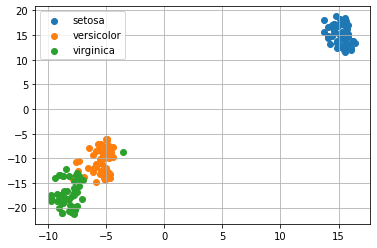

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(iris_data.data)
draw_embeddings(X_embedded, iris_data.target, iris_data.target_names)

In [ ]:
from sklearn.model_selection import train_test_split

TEST_SPLIT_SIZE = 0.3 # ADJUST
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=TEST_SPLIT_SIZE)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.build(input_shape=(None, 4))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
4/4 [==============================] - 0s 1ms/step - loss: 1.3060 - accuracy: 0.4762
Epoch 2/30
4/4 [==============================] - 0s 2ms/step - loss: 1.0147 - accuracy: 0.4286
Epoch 3/30
4/4 [==============================] - 0s 2ms/step - loss: 0.8858 - accuracy: 0.6667
Epoch 4/30
4/4 [==============================] - 0s 1ms/step - loss: 0.8240 - accuracy: 0.6667
Epoch 5/30
4/4 [==============================] - 0s 2ms/step - loss: 0.7604 - accuracy: 0.6667
Epoch 6/30
4/4 [==============================] - 0s 1ms/step - loss: 0.6956 - accuracy: 0.6667
Epoch 7/30
4/4 [==============================] - 0s 2ms/step - loss: 0.6414 - accuracy: 0.8952
Epoch 8/30
4/4 [==============================] - 0s 2ms/step - loss: 0.5978 - accuracy: 0.9524
Epoch 9/30
4/4 [==============================] - 0s 3ms/step - loss: 0.5586 - accuracy: 0.9524
Epoch 10/30
4/4 [==============================] - 0s 2ms/step - loss: 0.5259 - accuracy: 0.9619
Epoch 11/30
4/4 [======================

In [ ]:
model.evaluate(X_test,  y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.2357 - accuracy: 0.9778


[0.23571529984474182, 0.9777777791023254]

In [ ]:
sepal_length = 5.5
sepal_width = 2.3
petal_length = 4.2
petal_width = 1.2

my_features = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

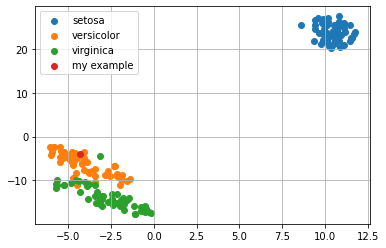

In [ ]:
new_data = np.concatenate((iris_data.data, my_features), axis=0)
new_targets = np.concatenate((iris_data.target, np.array([3])))
new_target_names = np.concatenate((iris_data.target_names, ['my example']))

X_embedded = TSNE(n_components=2).fit_transform(new_data)
draw_embeddings(X_embedded, new_targets, new_target_names)

In [ ]:
res = model.predict(my_features)
print(res)
pred = np.argmax(res)
print('Prediction: {}'.format(iris_data.target_names[pred]))

[[0.0237479 0.5893885 0.3868636]]
Prediction: versicolor
